# Assignment1 :Gradient Descent Learning Rule :Model 1
# Prabir Kumar Das 
# Roll - 20MM62R02
### Updating parameters for every training sample

## Load Packages

In [1]:
%matplotlib inline
import time
import torch
import numpy as np
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

print(torch.__version__) # This code has been updated for PyTorch 1.0.0

1.7.0+cu101


## Load Data

In [2]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./MNIST', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./MNIST', train=False,
                                       download=True, transform=transform)
BatchSize = 100
testloader = torch.utils.data.DataLoader(testset, batch_size=BatchSize,
                                         shuffle=False, num_workers=4) # Creating dataloader

Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw


Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw


Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
print('No. of training samples = '+str(len(trainset)))

No. of training samples = 60000


In [4]:
# Check availability of GPU

use_gpu = torch.cuda.is_available()
if use_gpu:
    print('GPU is available!')
    device = "cuda"
else:
    print('GPU is not available!')
    device = "cpu"

GPU is not available!


## Neural Network

In [5]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.Layer1 = nn.Sequential(
            nn.Linear(28*28, 400),
            nn.ReLU(),
            nn.Linear(400, 256),
            nn.ReLU())
        self.Layer2 = nn.Sequential(
            nn.Linear(256, 10))

    def forward(self, x):
        x = self.Layer1(x)
        x = self.Layer2(x)
        return x

In [6]:
net = NeuralNet()
net = net.to(device)

## Train Classifier

At Epoch 1: Loss = 0.220399 , Acc = 95.9400 %
Epoch completed in 2m 34s
At Epoch 2: Loss = 0.085200 , Acc = 97.2300 %
Epoch completed in 2m 33s
At Epoch 3: Loss = 0.054924 , Acc = 97.4200 %
Epoch completed in 2m 33s
Finished Training


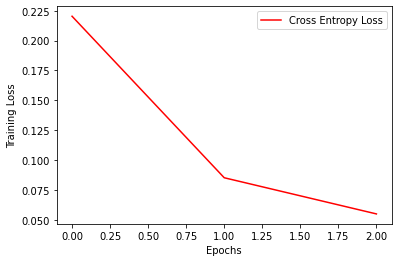

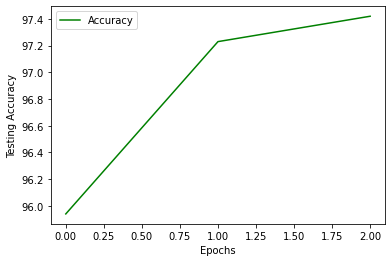

In [7]:
iterations = 3
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()

Plotacc = []
trainLoss = []

for epoch in range(iterations):  # loop over the dataset multiple times
    start = time.time()
    correct = 0  
    runningLoss = 0    
    total = 0
    net.train() # For training
    for i in range(len(trainset)): # i-->Sample number
        # get the inputs
        inputs = trainset[i][0]
        labels = trainset[i][1]*torch.ones(1)       
        inputs, labels = inputs.view(-1, 28*28).to(device), labels.long().to(device)        
              
        outputs = net(inputs) # forward 
        loss = criterion(outputs, labels) # calculate loss                 
   
        # Updating parameters for every training smaple      
        net.zero_grad()  # zeroes the gradient buffers of all parameters    
        loss.backward()
        for f in net.parameters():
            f.data.sub_(f.grad.data * learning_rate) # weight = weight - learning_rate * gradient (Update Weights) 
        runningLoss += loss.item()
    
    trainLoss.append(runningLoss/(i+1))   
    
    net.eval() # For testing [Affects batch-norm and dropout layers (if any)]
    with torch.no_grad(): # Gradient computation is not involved in inference
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.view(-1, 28*28).to(device), labels.to(device)
            total += labels.size(0)

            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum()        

    Plotacc.append(float(correct)*100/float(total))
    epochTimeEnd = time.time()-start
    print('At Epoch {:.0f}: Loss = {:.6f} , Acc = {:.4f} %'.format(epoch+1,runningLoss/(i+1),float(correct)*100.0/float(total)))   
    print('Epoch completed in {:.0f}m {:.0f}s'.format(epochTimeEnd // 60, epochTimeEnd % 60))
    
fig = plt.figure()        
plt.plot(range(epoch+1),trainLoss,'r-',label='Cross Entropy Loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')  
    
fig = plt.figure()        
plt.plot(range(epoch+1),Plotacc,'g-',label='Accuracy')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Testing Accuracy')  
print('Finished Training')
